In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: Fut

In [2]:
data_   = pd.read_csv('E:/Machine Learning/Kaggle/14701_19663_bundle_archive/CC GENERAL.csv')

In [3]:
data_.shape

(8950, 18)

In [4]:
data_.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
data_.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Check for missing values

In [6]:
def missings_(data):
    miss      = data.isnull().sum()
    miss_pct  = 100 * data.isnull().sum()/len(data)
    
    miss_pct      = pd.concat([miss,miss_pct], axis=1)
    missings_cols = miss_pct.rename(columns = {0:'Missings', 1: 'Missing pct'})
    missings_cols = missings_cols[missings_cols.iloc[:,1]!=0].sort_values('Missing pct', ascending = False).round(1)
    
    return missings_cols   

In [7]:
missings = missings_(data_)
missings

Missings  Missing pct
MINIMUM_PAYMENTS       313          3.5
CREDIT_LIMIT             1          0.0

### Plotting Histograms

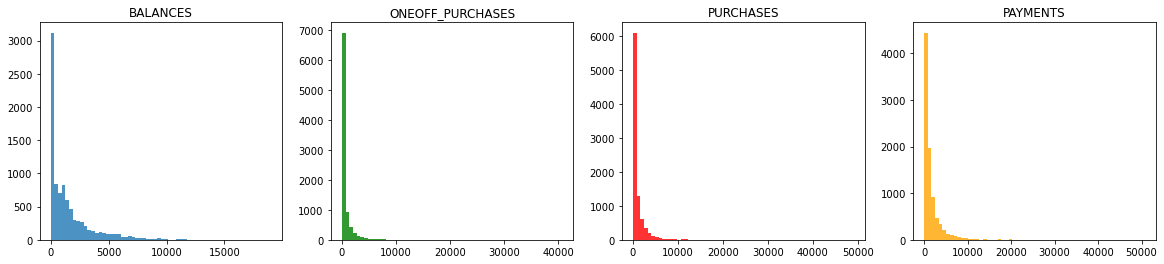

In [8]:
fig, ax = plt.subplots(1,4,figsize =(20,4))
ax0, ax1, ax2, ax3 = ax.flatten()

ax0.hist(data_['BALANCE'], bins = 60, alpha =0.8 )
ax1.hist(data_['ONEOFF_PURCHASES'], bins = 60, color="green" ,alpha =0.8 )
ax2.hist(data_['PURCHASES'], bins = 60, color="red",alpha =0.8 )
ax3.hist(data_['PAYMENTS'], bins = 60, color="orange",alpha =0.8 )

ax0.set_title("BALANCES")
ax1.set_title("ONEOFF_PURCHASES")
ax2.set_title("PURCHASES")
ax3.set_title("PAYMENTS")

plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


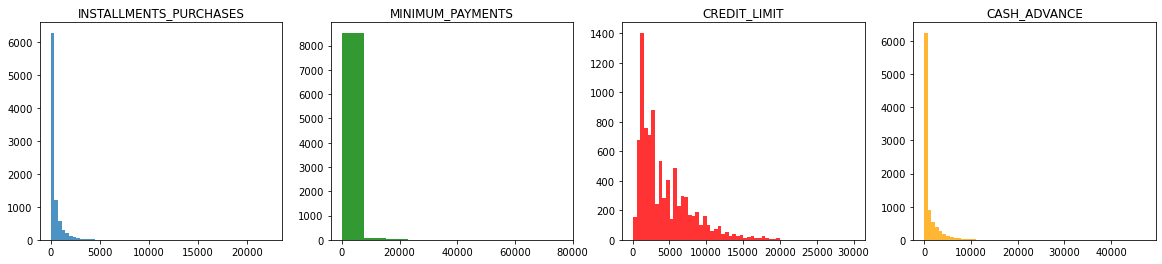

In [9]:
fig, ax = plt.subplots(1,4,figsize =(20,4))
ax0, ax1, ax2, ax3 = ax.flatten()

ax0.hist(data_['INSTALLMENTS_PURCHASES'], bins = 60, alpha =0.8 )
ax1.hist(data_['MINIMUM_PAYMENTS'], bins = 10, color="green" ,alpha =0.8 )
ax2.hist(data_['CREDIT_LIMIT'], bins = 60, color="red",alpha =0.8 )
ax3.hist(data_['CASH_ADVANCE'], bins = 60, color="orange",alpha =0.8 )

ax0.set_title("INSTALLMENTS_PURCHASES")
ax1.set_title("MINIMUM_PAYMENTS")
ax2.set_title("CREDIT_LIMIT")
ax3.set_title("CASH_ADVANCE")

plt.show()

### Scatter plot of variables

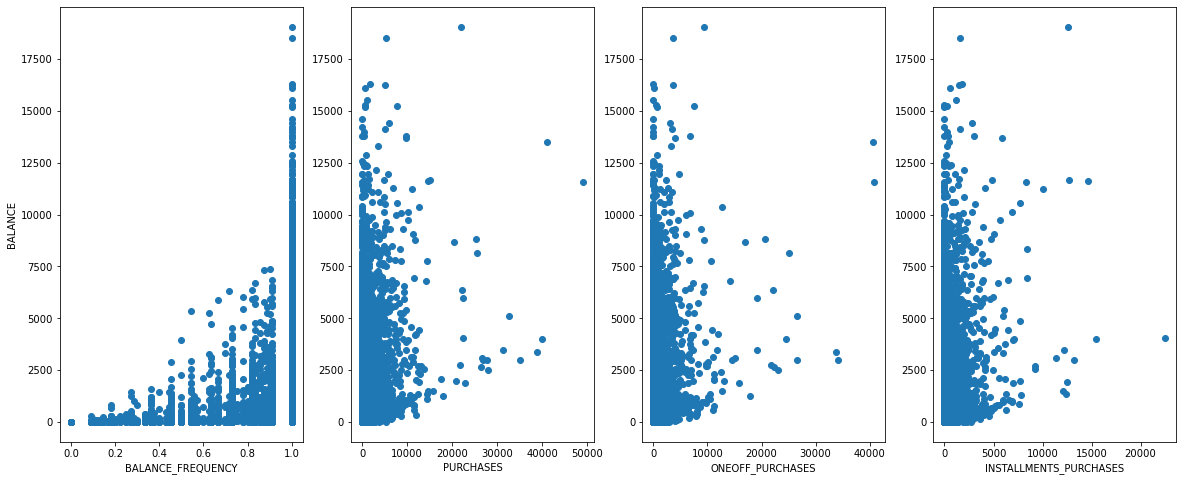

In [10]:
cols   = data_.columns
fig , ax = plt.subplots(1,4, figsize = (20,8))
ax0, ax1, ax2, ax3 = ax.flatten() 

for i in range(0,4):
    
    X   = data_[cols[i+2]]
    Y   = data_[cols[1]]
    ax[i].plot(X, Y, marker = 'o', linestyle = "None")
    ax[i].set_xlabel(cols[i+2])
    ax[0].set_ylabel(cols[1])

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


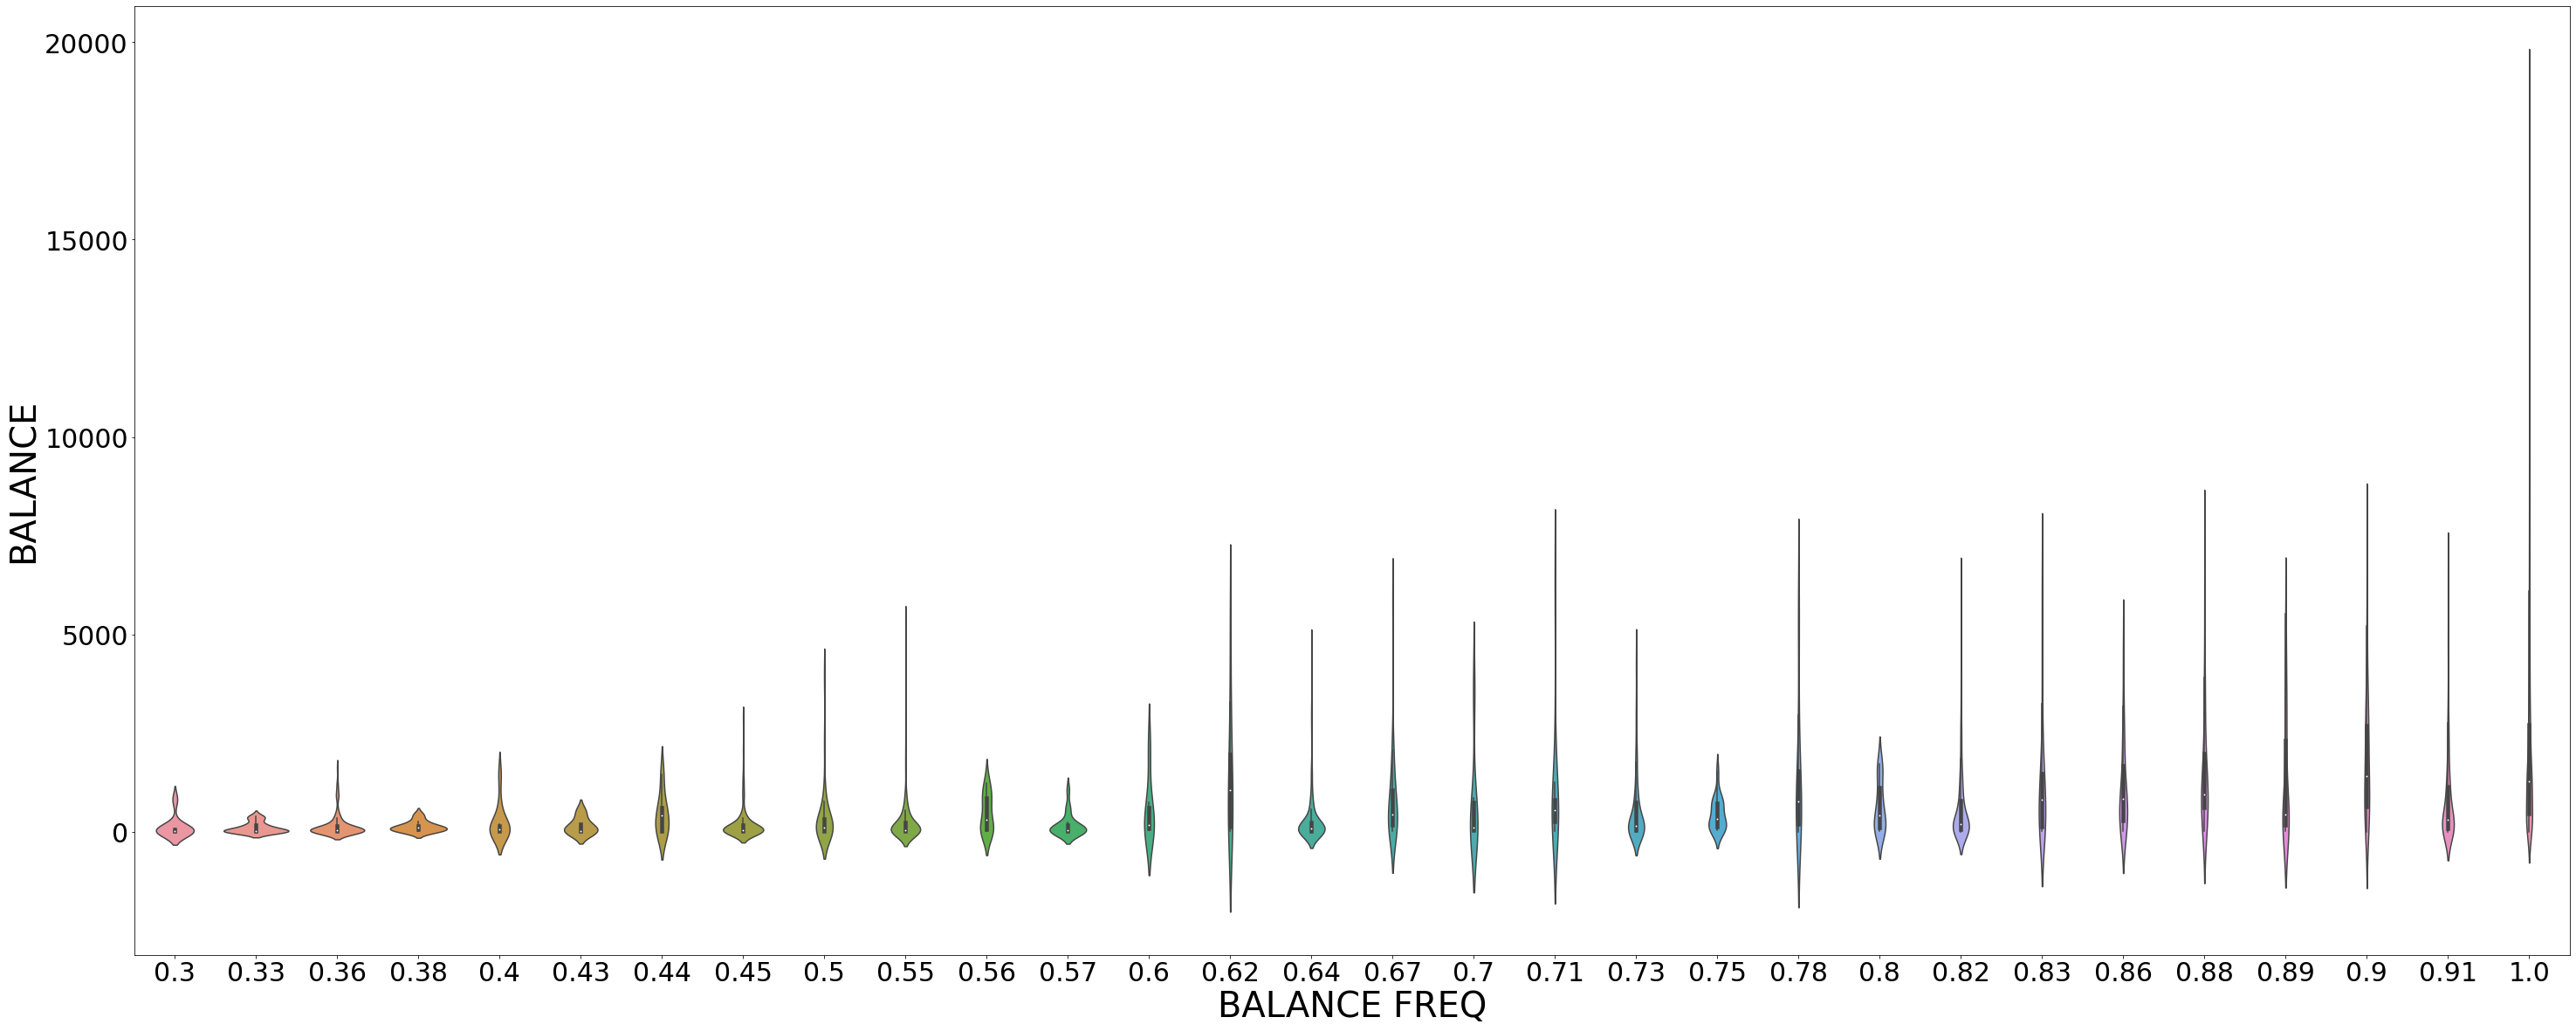

In [11]:
fig = plt.figure(figsize = (50,20))
data_sub = data_[(data_['BALANCE_FREQUENCY']>=0.3)]
data_sub['BALANCE_FREQ'] = round(data_['BALANCE_FREQUENCY'],2)

sns.violinplot(y='BALANCE',x='BALANCE_FREQ',data=data_sub)
plt.xlabel('BALANCE FREQ',fontsize=40)
plt.ylabel('BALANCE',fontsize=40)
plt.tick_params(labelsize=30)

## Exploring the PURCHASES
### ONE OFF PURCHASE, PURCHASE & INSTALLMENT PURCHASES
#### Exploring them by Balance Left in their account

In [12]:
data_['Balance_decile'] = pd.qcut(data_['BALANCE'], q=10)

In [13]:
data_grp   = data_.groupby('Balance_decile', as_index=False).mean()
data_grp   = data_grp[['Balance_decile', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]
data_grp_t = pd.melt(data_grp, id_vars = 'Balance_decile')

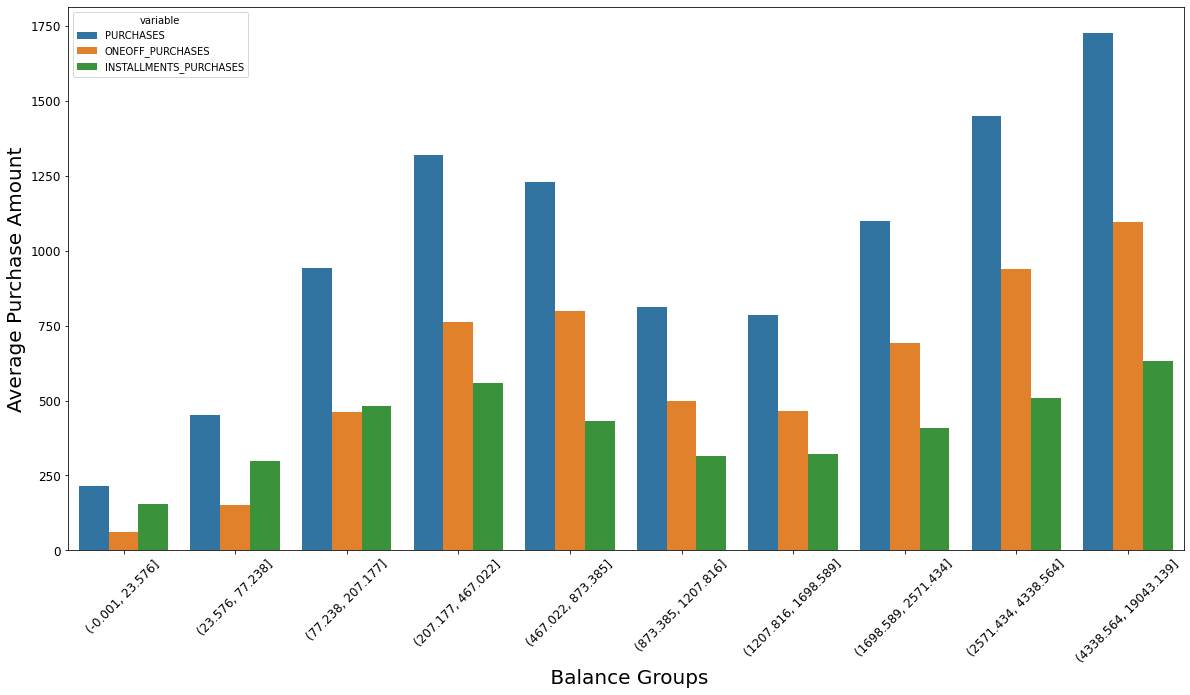

In [14]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x= "Balance_decile" , y = "value", hue = 'variable', data =data_grp_t)
plt.ylabel("Average Purchase Amount", fontsize=20)
plt.xlabel(" Balance Groups", fontsize =20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

### Finding Average Balance left by Frequency of Purchases

In [15]:
data_['freq_purchase_decile'] = pd.qcut(data_['PURCHASES_FREQUENCY'], q=4)

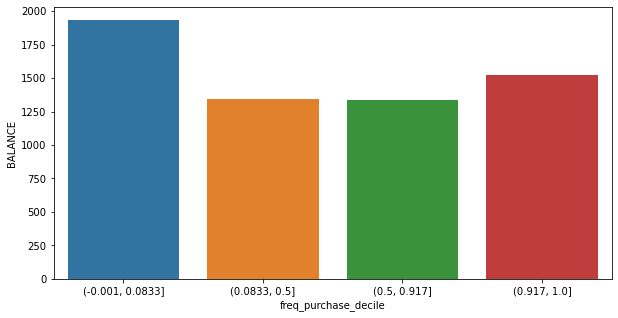

In [16]:
data_bal   = data_.groupby('freq_purchase_decile', as_index=False).mean()
fig = plt.figure(figsize=(10,5))
sns.barplot(x= "freq_purchase_decile" , y = "BALANCE", data =data_bal)
plt.show()

### Find Credit Card Utilization

In [17]:
data_['CREDIT_LIMIT'].fillna(1, inplace=True)
data_['CC_utilisation']     = (data_['CREDIT_LIMIT'] - data_['BALANCE'])/data_['CREDIT_LIMIT']

In [18]:
data_['CC_util_decile']     = pd.qcut(data_['CC_utilisation'], q=10)
data_cc_grp                 = data_.groupby('CC_util_decile', as_index=False).mean()
data_cc_grp                 = data_cc_grp[['CC_util_decile', 'PAYMENTS' , 'MINIMUM_PAYMENTS']]
data_cc_grp_t               = pd.melt(data_cc_grp, id_vars = 'CC_util_decile')

In [19]:
data_cc_grp.columns

Index(['CC_util_decile', 'PAYMENTS', 'MINIMUM_PAYMENTS'], dtype='object')

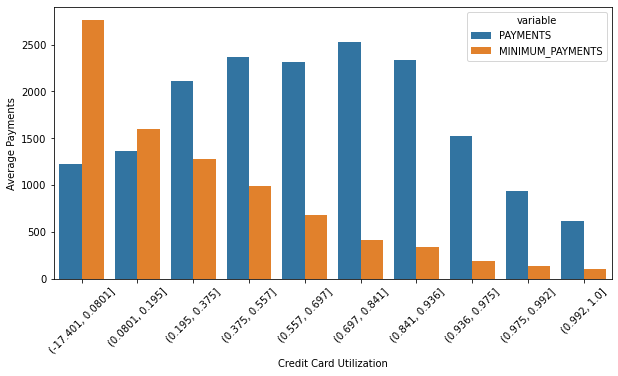

In [20]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x= "CC_util_decile" , y = "value", hue = "variable" ,data =data_cc_grp_t)
plt.xlabel("Credit Card Utilization")
plt.ylabel("Average Payments")
plt.xticks(rotation=45)
plt.show()

## Creating clusters for better marketing strategy

### As we see at the top with our histograms, majority of the variables are right skewed, so we might need to make bins for them

In [21]:
data_n  = data_.copy()

In [22]:
print(data_n.columns)
data_.describe()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Balance_decile',
       'freq_purchase_decile', 'CC_utilisation', 'CC_util_decile'],
      dtype='object')


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4493.947389   
std                  0.200121          6.824647      24.857649   3638.922405   
min                  0.000000          0.000000       0.000000      1.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   8950.000000       8637.000000       8950.000000  8950.000000   
mean    1733.143852        864.206542          0.153715    11.517318   
std     2895.063757       2372.446607          0.292499     1.338331   
min        0.000000          0.019163          0.000000     6.000000   
25%      383.276166        169.123707          0.000000    12.000000   
50%      856.901546        312.343947          0.000000    12.000000   
75%     1901.134317        825.485459          0.142857    12.000000   
max    50721.483360      76406.207520          1.000000    12.000000   

       CC_utilisation  
count     8950.000000  
mean         0.609061  
std          0.433721  
min        -17.400472  
25%          0.282416  
50%          0.697018  
75%          0.958467  
max          1.000000

### Creating bins for the variable to tackle outliers

In [23]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','CASH_ADVANCE',
         'CREDIT_LIMIT', 'PAYMENTS']
for c in cols:
    bins = c+'_bin'
    max_ = max(data_n[c])
    data_n[bins] = pd.cut(data_n[c], bins=[0,500,1000,3000,5000,10000,15000,max_],labels = [1,2,3,4,5,6,7], include_lowest= True)

In [24]:
cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY']
for c in cols:
    bins = c+'_bin'
    max_ = max(data_[c])
    data_n[bins] = pd.cut(data_n[c], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,max_],labels = [1,2,3,4,5,6,7,8,9,10], include_lowest= True)

In [25]:
cols = ['CASH_ADVANCE_TRX', 'PURCHASES_TRX']

for c in cols:
    bins = c+'_bin'
    max_ = max(data_[c])
    data_n[bins] = pd.cut(data_n[c], bins=[0,20,40,60,80,100,max_],labels = [1,2,3,4,5,6], include_lowest= True)

In [26]:
data_.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Balance_decile',
       'freq_purchase_decile', 'CC_utilisation', 'CC_util_decile'],
      dtype='object')

### Dropping columns before starting k-mean clustering

In [27]:
data_model  = data_n.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'Balance_decile',
       'freq_purchase_decile', 'CC_utilisation', 'TENURE', 'PURCHASES_TRX_bin', 'CASH_ADVANCE_TRX_bin'], axis=1)

In [28]:
data_model  = data_model.drop(['CC_util_decile'], axis =1)

In [29]:
missings = missings_(data_model)
missings

Empty DataFrame
Columns: [Missings, Missing pct]
Index: []

### Standardizing the variables

In [30]:
stand_         = StandardScaler()
data_model_std = stand_.fit_transform(data_model)

In [31]:
random.seed(234)
n_clusters=20
sse=[]
for i in range(1,n_clusters+1):
    kmean= KMeans(i)
    kmean.fit(data_model_std)
    sse.append([i, kmean.inertia_]) 

In [32]:
sse

[[1, 98450.00000000001],
 [2, 75679.62005033],
 [3, 60711.86387025842],
 [4, 51586.790158087526],
 [5, 45335.23559375138],
 [6, 41951.519083086845],
 [7, 39645.57098559681],
 [8, 37683.91437181927],
 [9, 35947.48825861922],
 [10, 34664.19422448358],
 [11, 33315.05417485246],
 [12, 32301.630794232835],
 [13, 31466.825907583378],
 [14, 30411.925768117984],
 [15, 29711.69020878189],
 [16, 28965.81183498773],
 [17, 28267.896852901245],
 [18, 27589.839430479944],
 [19, 27118.373619621438],
 [20, 26600.603634775212]]

Text(0.5, 1.0, 'Elbow Curve')

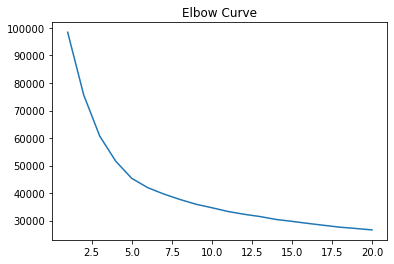

In [33]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title("Elbow Curve")

In [60]:
## Checking the elbow curve, we go with 8 clusters

In [39]:
random.seed(234)
kmean= KMeans(8)
kmean.fit(data_model_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmean.cluster_centers_

array([[-9.68933281e-01, -6.21392039e-01, -4.94487243e-01,
        -3.69077771e-01, -4.02000681e-01, -6.45677278e-01,
        -2.26486392e+00, -5.03065106e-01, -5.28862400e-01,
        -3.29027020e-01, -4.73266149e-01,  4.93175355e+00],
       [-3.83119200e-01,  2.55759099e-01, -8.70091168e-03,
        -5.34916099e-01,  1.38433667e-01, -1.22931501e-01,
         1.50833719e-01,  8.70681400e-01, -1.30690024e-01,
         1.01247057e+00, -5.00871649e-01,  1.15230850e+01],
       [ 4.11936660e-01,  6.75501265e-01,  8.49611225e-01,
         2.03480332e-01,  7.81388592e-01,  7.30098172e-01,
         4.23902352e-01,  4.02516611e-01,  1.11231097e+00,
         8.82181407e-02,  1.20968224e-01,  1.81280433e+01],
       [-1.04316285e-01,  7.91349260e-01,  4.42433456e-01,
        -4.68804931e-01, -4.35535070e-01,  1.64951636e-01,
         3.35586851e-01,  5.32061399e-01,  1.42067332e-01,
         3.85425921e-01, -4.32131183e-01,  1.48155738e+00],
       [ 1.67215844e+00, -6.21075532e-01, -4.5166106

In [41]:
y_kmeans = kmean.predict(data_model_std)
y_kmeans

array([5, 4, 6, ..., 1, 5, 3])

In [42]:
data_model['Cluster']       = y_kmeans
data_model_std              = pd.DataFrame(data_model_std)
data_model_std['Cluster']   = y_kmeans

In [43]:
data_model['Cluster'].value_counts()

5    2068
1    1906
2    1109
0    1055
3     976
6     734
7     602
4     500
Name: Cluster, dtype: int64

### Visualizing the clusters to check if some clusters could be combined

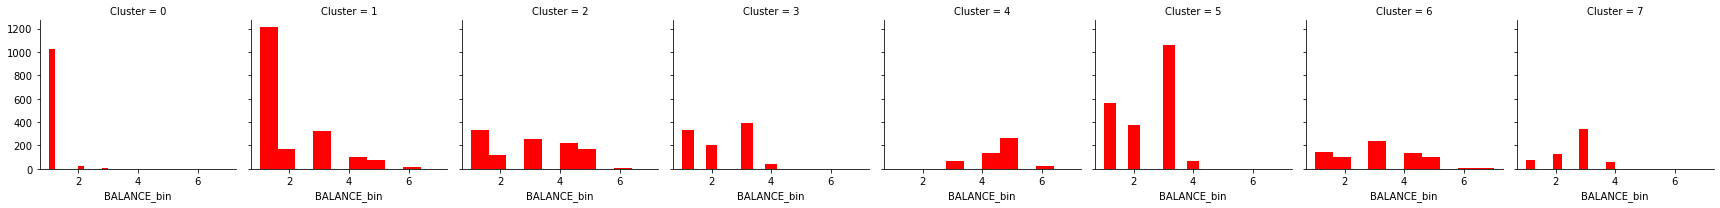

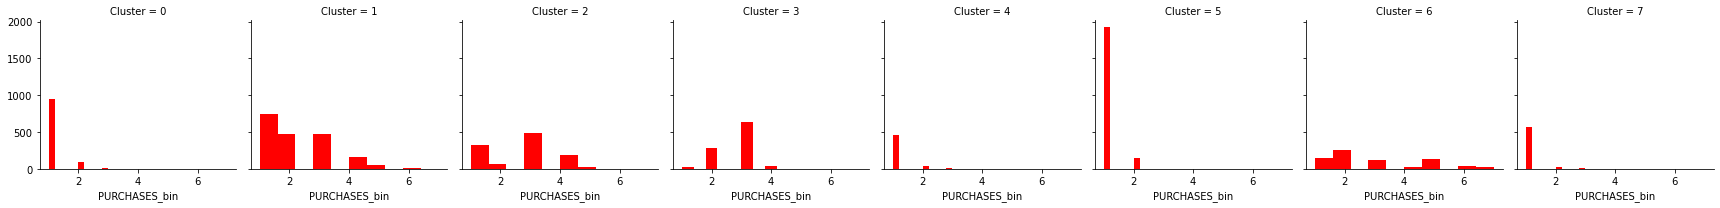

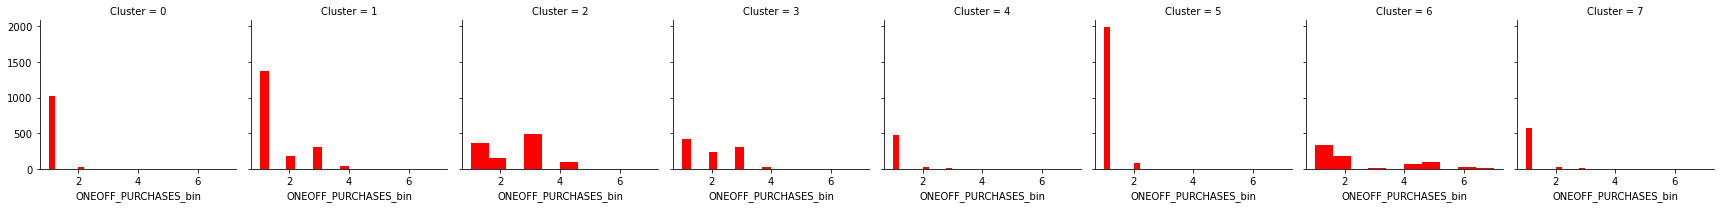

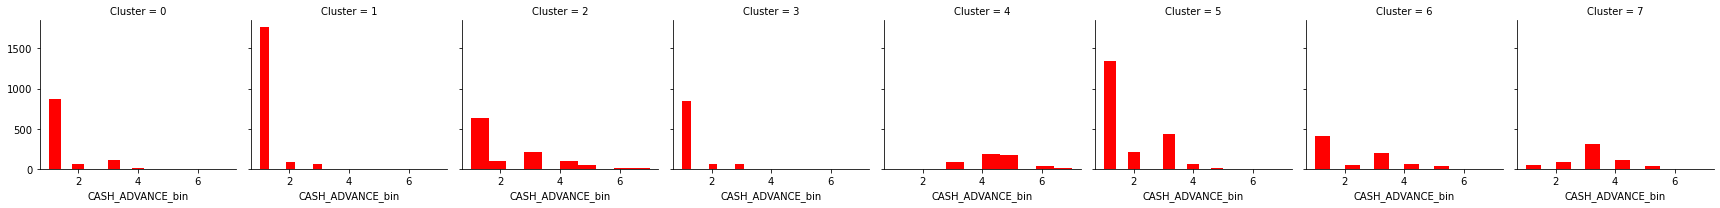

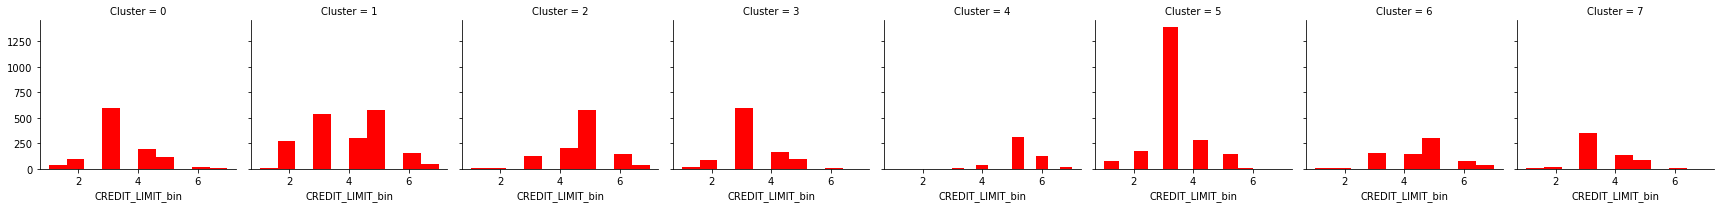

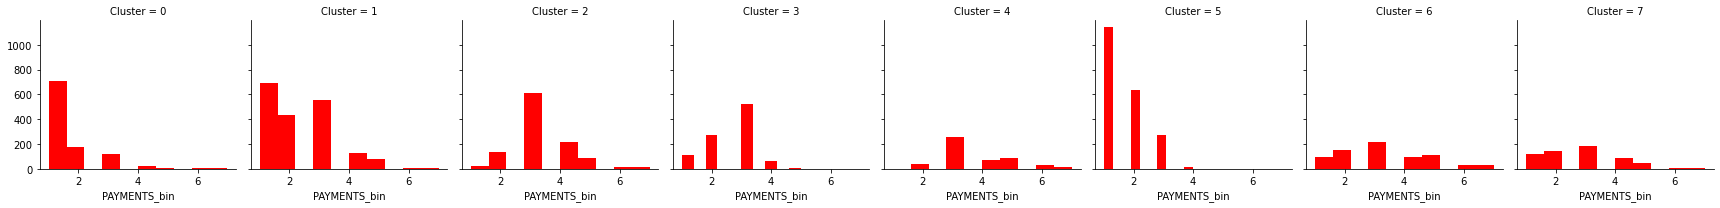

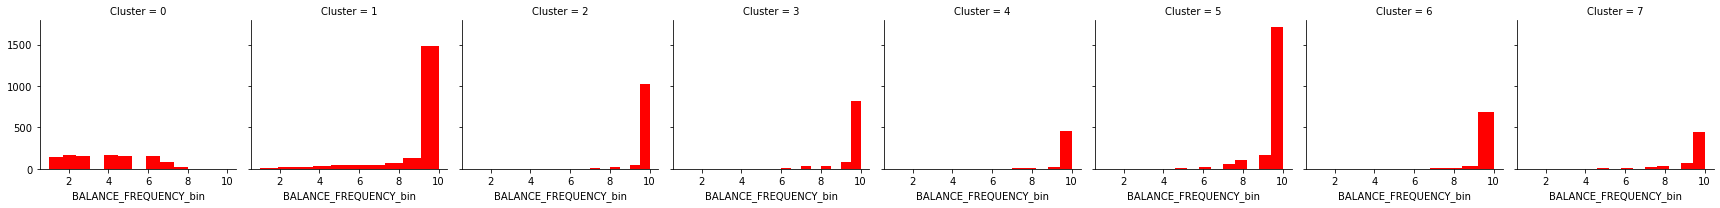

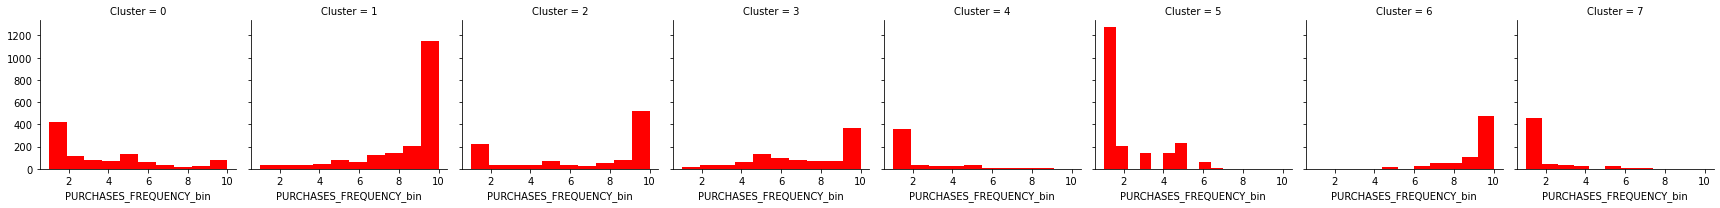

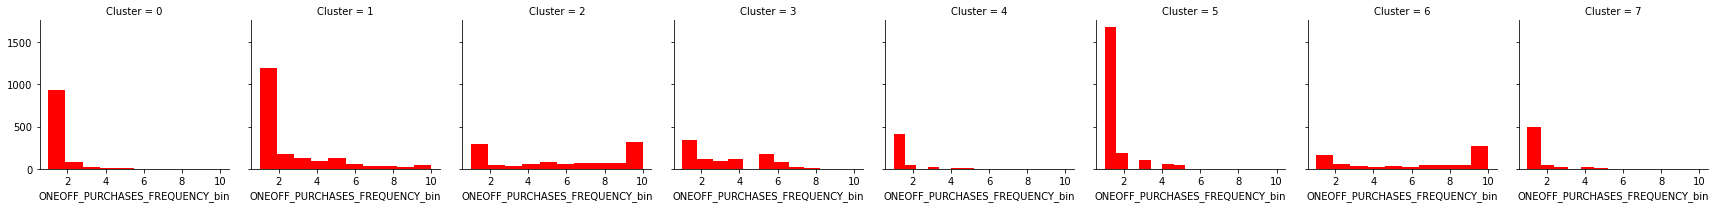

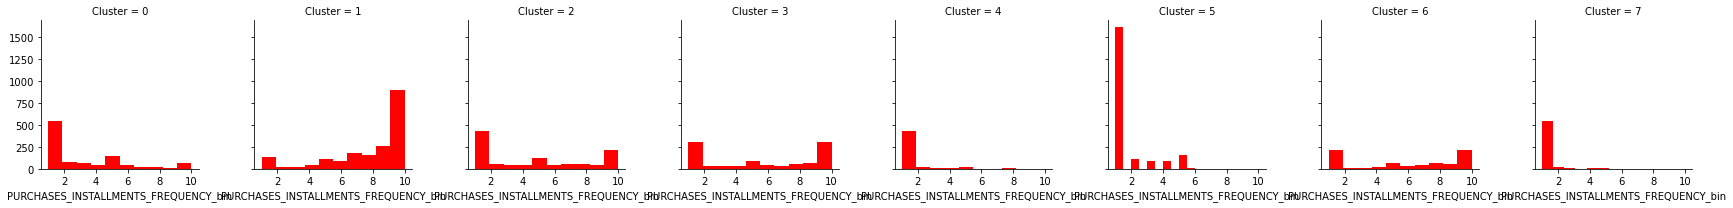

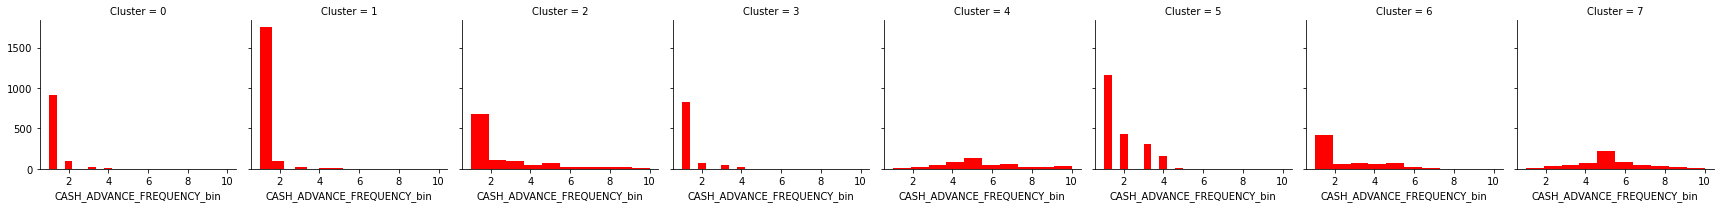

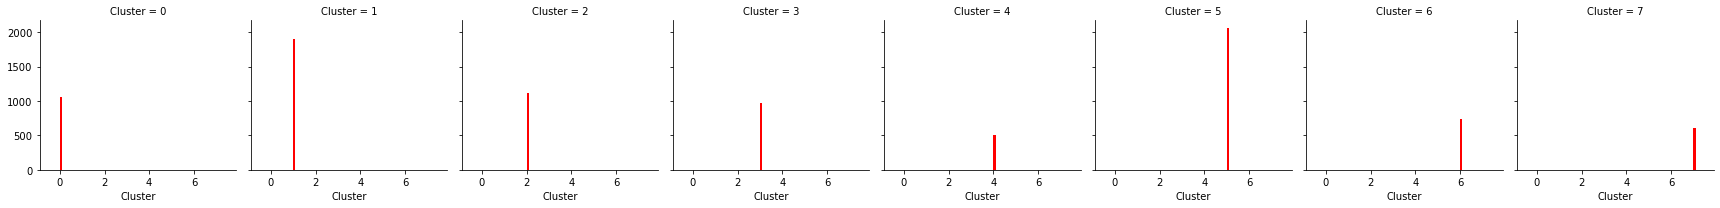

In [44]:
for c in data_model:
    g   = sns.FacetGrid(data_model, col='Cluster')
    g.map(plt.hist, c, color = "red")

In [66]:
g.savefig('E:/Blog/Visualization/Clustering/facetgrid.eps')

### Seeing the clusters we try to regroup them on the basis of their variable distributions
#### Cluster 1 and 3 could be combined
#### Cluster 0 and 2 could be combined
#### Cluster 4 and 5 could be combined

In [47]:
data_model["Cluster"].replace({3: 1, 2: 0, 5:4}, inplace=True)

In [48]:
data_model['Cluster'].value_counts()

1    2882
4    2568
0    2164
6     734
7     602
Name: Cluster, dtype: int64

In [49]:
data_model_std["Cluster"].replace({3: 1, 2: 0, 5:4}, inplace=True)

In [50]:
clusters_   = data_model["Cluster"]

### Principal Component Analysis

In [51]:
random.seed(32)
pca = PCA()
pca.fit(data_model_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca.explained_variance_ratio_

array([0.39175629, 0.21893979, 0.12056982, 0.07833364, 0.0476259 ,
       0.04049823, 0.03290232, 0.0241274 , 0.01939133, 0.01559503,
       0.00674637, 0.00351388])

Text(0, 0.5, 'Cumulative Variance Explained')

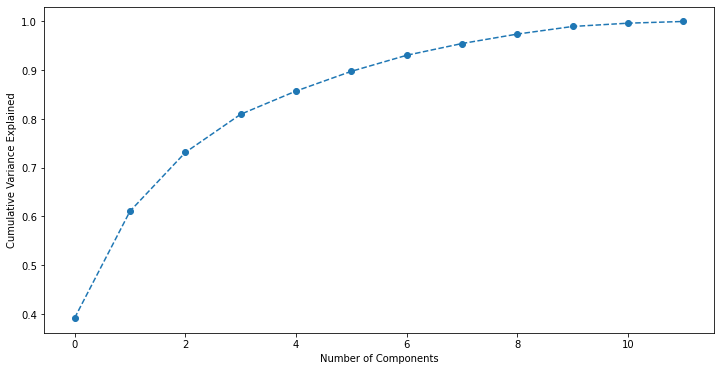

In [53]:
fig = plt.figure(figsize =(12,6))
plt.plot(range(0,12),pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle = "--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")

In [54]:
pca = PCA(n_components = 3)
pca.fit(data_model_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Finding the Scores from PCA

In [55]:
scores = pca.transform(data_model_std)

In [57]:
x,y = scores[:,0] , scores[:,1]

df_data = pd.DataFrame({'x': x, 'y':y, 'clusters':clusters_})

In [59]:
grouping_ = df_data.groupby('clusters')

### Plotting a 2-D Visualization

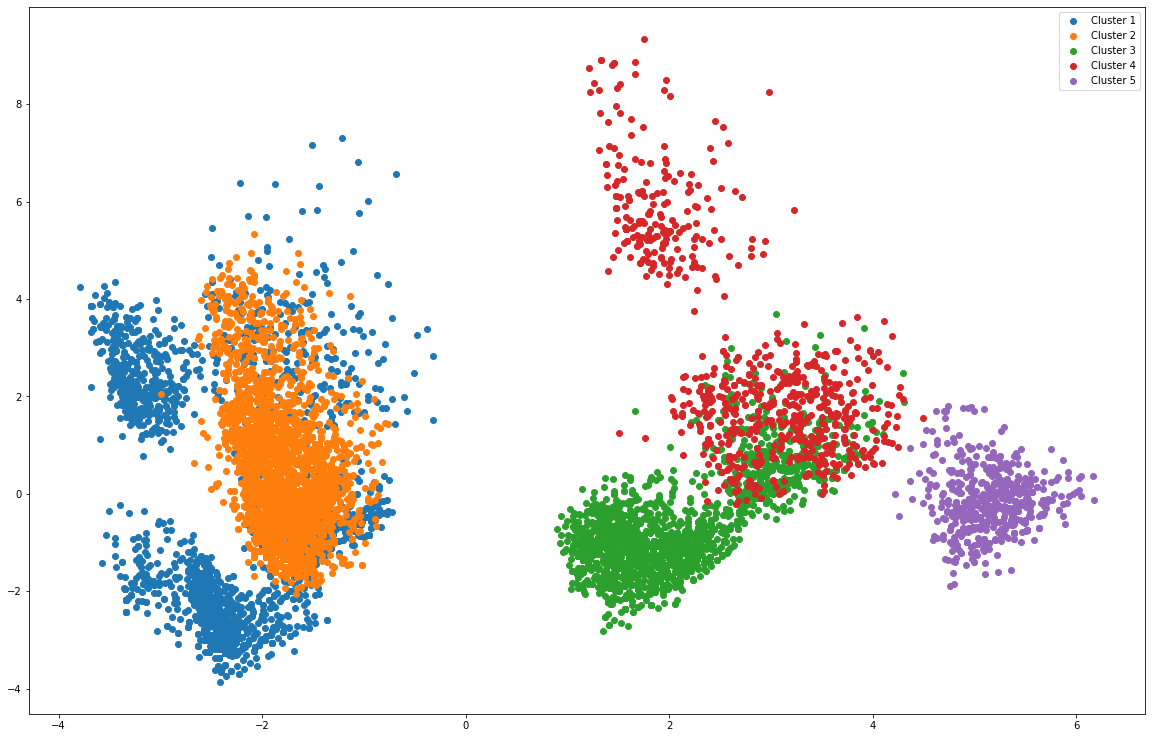

In [60]:
fig, ax = plt.subplots(figsize=(20, 13))

names = {0: 'Cluster 1', 
         1: 'Cluster 2', 
         4: 'Cluster 3',
         6: 'Cluster 4',
         7: 'Cluster 5'}

for name, grp in grouping_:
    ax.plot(grp.x, grp.y, marker='o', label = names[name], linestyle='')
    ax.set_aspect('auto')

ax.legend()
plt.show()

### Plotting in a 3D Visualization

In [61]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [62]:
x,y,z = scores[:,0] , scores[:,1], scores[:,2]

df_data = pd.DataFrame({'x': x, 'y':y, 'z':z, 'clusters':clusters_})

In [63]:
df_data.head()

x         y         z  clusters
0  1.457686 -2.163101 -1.575133         4
1  2.909435  0.368194  2.581101         4
2  2.637082  2.231918 -2.106370         6
3 -1.407604 -0.127502  0.930300         1
4  1.703229 -1.432266 -0.813436         4

In [246]:
type(cluster1)

pandas.core.frame.DataFrame

In [64]:
# Visualize cluster shapes in 3d.

cluster1=df_data.loc[df_data['clusters'] == 0]
cluster2=df_data.loc[df_data['clusters'] == 1]
cluster3=df_data.loc[df_data['clusters'] == 4]
cluster4=df_data.loc[df_data['clusters'] == 6]
cluster5=df_data.loc[df_data['clusters'] == 7]


scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.to_numpy()[:,0], y = cluster1.to_numpy()[:,1], z = cluster1.to_numpy()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.to_numpy()[:,0], y = cluster2.to_numpy()[:,1], z = cluster2.to_numpy()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.to_numpy()[:,0], y = cluster3.to_numpy()[:,1], z = cluster3.to_numpy()[:,2],
    marker = dict( size=2, color='red')
)

scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.to_numpy()[:,0], y = cluster4.to_numpy()[:,1], z = cluster4.to_numpy()[:,2],
    marker = dict( size=2, color='orange')
)

scatter5 = dict(
    mode = "markers",
    name = "Cluster 5",
    type = "scatter3d",    
    x = cluster5.to_numpy()[:,0], y = cluster5.to_numpy()[:,1], z = cluster5.to_numpy()[:,2],
    marker = dict( size=2, color='yellow')
)


################## Clusters  ##############

cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.to_numpy()[:,0], y = cluster1.to_numpy()[:,1], z = cluster1.to_numpy()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.to_numpy()[:,0], y = cluster2.to_numpy()[:,1], z = cluster2.to_numpy()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.to_numpy()[:,0], y = cluster3.to_numpy()[:,1], z = cluster3.to_numpy()[:,2],
    color='red', showscale = True
)

cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.to_numpy()[:,0], y = cluster4.to_numpy()[:,1], z = cluster4.to_numpy()[:,2],
    color='orange', showscale = True
)

cluster5 = dict(
    alphahull = 5,
    name = "Cluster 5",
    opacity = .1,
    type = "mesh3d",    
    x = cluster5.to_numpy()[:,0], y = cluster5.to_numpy()[:,1], z = cluster5.to_numpy()[:,2],
    color='yellow', showscale = True
)

layout = dict(
    title = '3D visulization of Clusters',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, scatter4, scatter5, cluster1, cluster2, cluster3, cluster4, cluster5], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

### Profiling the customers

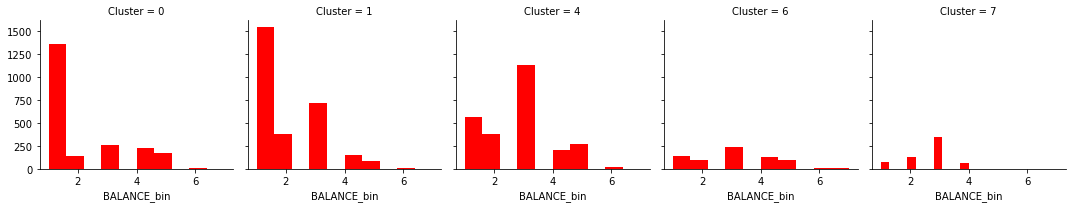

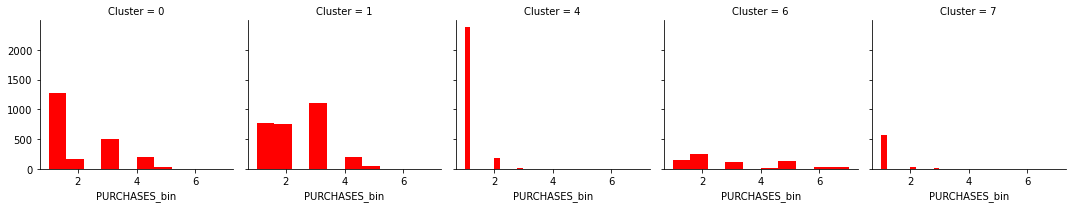

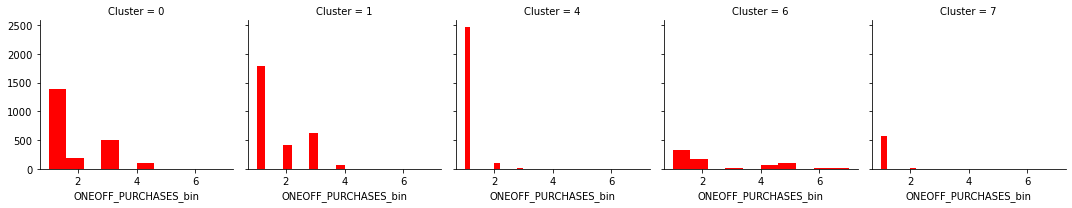

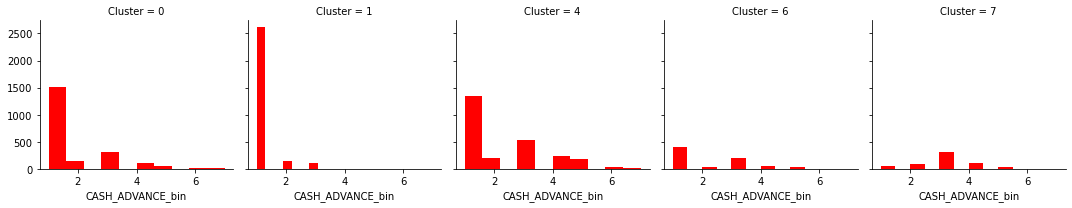

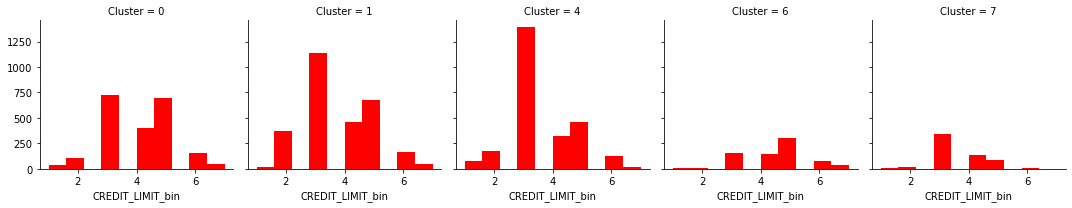

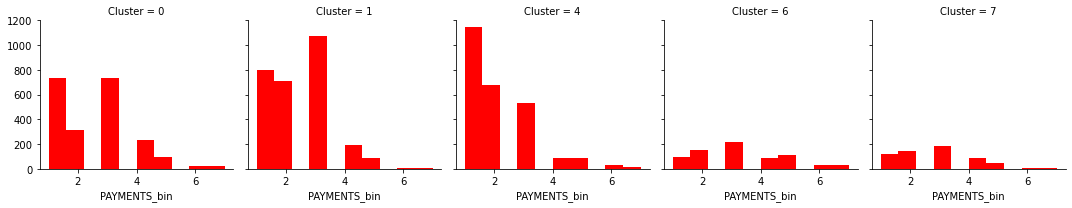

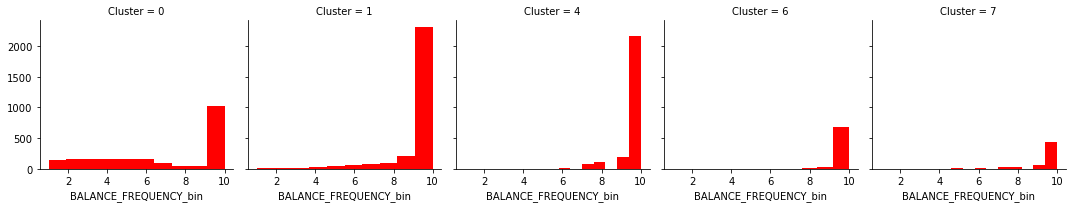

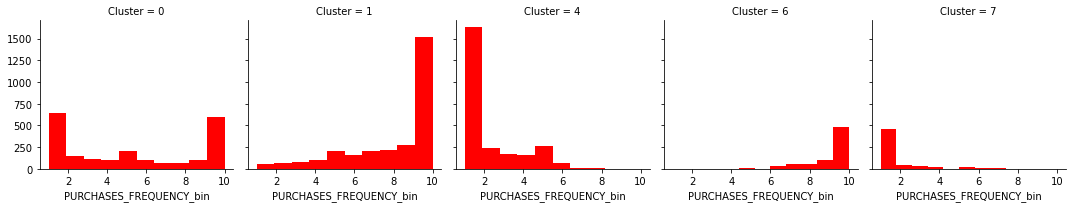

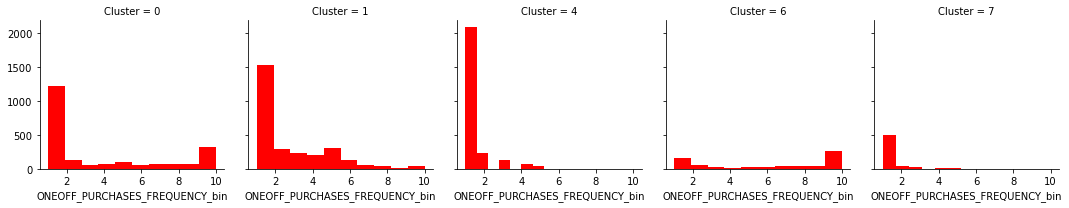

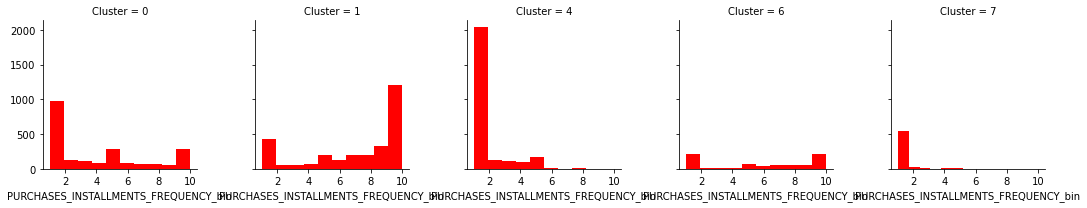

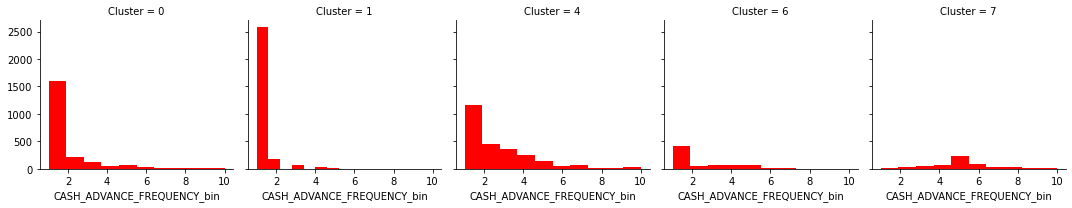

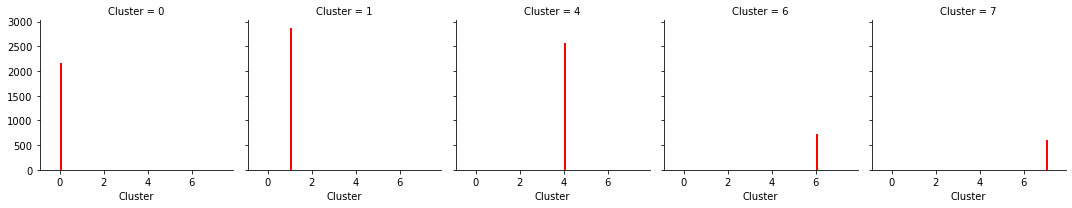

In [69]:
#fig  = plt.figure(figsize = (7200,30))
for c in data_model:
    g   = sns.FacetGrid(data_model, col='Cluster')
    g.map(plt.hist, c, color = "red")

In [ ]:
### Cluster 0: Who do not purchase but have good credit limit. Also miss payments 
### Cluster 1: Who have a good balance, make average purchases and do make payments
### Cluster 4: Who buy frequntly and have a high credit limit
### Cluster 6: Who buy very small, keeps low balance but frequently pay dues
### Cluster 7: Who buy in installments only